# MadMiner Parton-Level Analysis for $W\gamma$: Step 2 - Analysis

Johann Brehmer, Felix Kling, Kyle Cranmer 2018

In this tutorial we'll demonstrate how to use MadMiner to generate train and test samples for the Information Geometry methods introduced in the following papers:
- J. Brehmer, K. Cranmer, F. Kling, T. Plehn: ["Better Higgs Measurements Through Information Geometry"](https://arxiv.org/abs/1612.05261)
- J. Brehmer, F. Kling, T. Plehn, T.M.P. Tait: ["Better Higgs-CP Tests Through Information Geometry"](https://arxiv.org/abs/1712.02350)

## 0. Preparations

In [1]:
import sys
import os
madminer_src_path = "/Users/felixkling/Documents/GitHub/madminer"
sys.path.append(madminer_src_path)

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline

from madminer.fisherinformation import FisherInformation
from madminer.fisherinformation import project_information,profile_information

from madminer.plotting import plot_fisher_information_contours_2d
from madminer.plotting import plot_fisherinfo_barplot
from madminer.plotting import kinematic_distribution_of_information

from madminer.sampling import SampleAugmenter
from madminer.sampling import constant_benchmark_theta, multiple_benchmark_thetas
from madminer.sampling import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas
from madminer.ml import MLForge, EnsembleForge


## 1. Calculate Fisher Information - Truth

In [2]:
#Setup MadFisher
mf = FisherInformation('data/madminer_wgamma_observables_500k.h5')

# Define Benchmark
thistheta=np.array([0,0])

#Define luminosity in inverse pb
thislumi=300*1000;

#Define Cuts
#thiscuts = ['pt_a>300','pt_v>80','pt_l>80']
thiscuts=[]

#This efficiency
thisefficiencies = []

#Define Histogram 1D
obs_dphilv='dphi_lv'
obs_dphilv_range=(-1,1)
obs_dphilv_nbins=20

obs_ptv='pt_v'
obs_ptv_range=(0,1000)
obs_ptv_nbins=20

obs_pta='pt_a'
obs_pta_range=(0,1000)
obs_pta_nbins=20

#Full Fisher Info

fi_full = mf.calculate_fisher_information_full_truth(theta=thistheta,
                                                     luminosity=thislumi,
                                                     cuts=thiscuts,
                                                     efficiency_functions=thisefficiencies
                                                     )

fi_rate = mf.calculate_fisher_information_rate(theta=thistheta,
                                                     luminosity=thislumi,
                                                     cuts=thiscuts,
                                                     efficiency_functions=thisefficiencies
                                                     )

fi_1D_dphilv = mf.calculate_fisher_information_hist1d(theta=thistheta,
                                                       luminosity=thislumi,
                                                       observable=obs_dphilv,
                                                       nbins=obs_dphilv_nbins,
                                                       histrange=obs_dphilv_range,
                                                       cuts=thiscuts,
                                                       efficiency_functions=thisefficiencies
                                                       )

fi_1D_dptv = mf.calculate_fisher_information_hist1d(theta=thistheta,
                                                       luminosity=thislumi,
                                                       observable=obs_ptv,
                                                       nbins=obs_ptv_nbins,
                                                       histrange=obs_ptv_range,
                                                       cuts=thiscuts,
                                                       efficiency_functions=thisefficiencies
                                                       )

fi_1D_dpta = mf.calculate_fisher_information_hist1d(theta=thistheta,
                                                       luminosity=thislumi,
                                                       observable=obs_pta,
                                                       nbins=obs_pta_nbins,
                                                       histrange=obs_pta_range,
                                                       cuts=thiscuts,
                                                       efficiency_functions=thisefficiencies
                                                       )

fi_2D_dphilv_dpta = mf.calculate_fisher_information_hist2d(theta=thistheta,
                                                       luminosity=thislumi,
                                                       observable1=obs_dphilv,
                                                       nbins1=obs_dphilv_nbins,
                                                       histrange1=obs_dphilv_range,
                                                       observable2=obs_pta,
                                                       nbins2=obs_pta_nbins,
                                                       histrange2=obs_pta_range,
                                                       cuts=thiscuts,
                                                       efficiency_functions=thisefficiencies,
                                                       )

print ('Full       Fisher Info: \n' , fi_full, "\n Determinant: "     , np.linalg.det(fi_full) )  
print ('Rate       Fisher Info: \n' , fi_rate, "\n Determinant: "     , np.linalg.det(fi_rate) )
print ('1D dphilv  Fisher Info: \n' , fi_1D_dphilv, "\n Determinant: ", np.linalg.det(fi_1D_dphilv) ) 
print ('1D dptv    Fisher Info: \n' , fi_1D_dptv  , "\n Determinant: ", np.linalg.det(fi_1D_dptv) ) 
print ('1D dpta    Fisher Info: \n' , fi_1D_dpta  , "\n Determinant: ", np.linalg.det(fi_1D_dpta) ) 
print ('2D         Fisher Info: \n' , fi_2D_dphilv_dpta  , "\n Determinant: ", np.linalg.det(fi_2D_dphilv_dpta) ) 

15:10  
15:10  ------------------------------------------------------------
15:10  |                                                          |
15:10  |  MadMiner v2018.10.26                                    |
15:10  |                                                          |
15:10  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
15:10  |                                                          |
15:10  ------------------------------------------------------------
15:10  
15:10  Loading data from data/madminer_wgamma_observables_500k.h5
15:10  Found 2 parameters:
15:10     CWL2 (LHA: dim6 2, maximal power in squared ME: (2,), range: (-50.0, 50.0))
15:10     CPWL2 (LHA: dim6 5, maximal power in squared ME: (2,), range: (-50.0, 50.0))
15:10  Found 6 benchmarks:
15:10     sm: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
15:10     w: CWL2 = 20.00, CPWL2 = 0.00e+00
15:10     morphing_basis_vector_2: CWL2 = -4.72e+01, CPWL2 = 23.25
15:10     morphing_basis_vector_3: CWL2 = 18.64, CPWL2 =

Full       Fisher Info: 
 [[ 1.16695493e-01 -4.69508744e-04]
 [-4.69508744e-04  4.77698616e-01]] 
 Determinant:  0.055745055056624734
Rate       Fisher Info: 
 [[6.42935916e-04 6.38992944e-05]
 [6.38992944e-05 6.35074154e-06]] 
 Determinant:  -5.157109710234834e-25
1D dphilv  Fisher Info: 
 [[ 8.73261646e-04 -1.49730347e-05]
 [-1.49730347e-05  1.07501453e-01]] 
 Determinant:  9.38766712876728e-05
1D dptv    Fisher Info: 
 [[8.69796336e-04 9.45254451e-05]
 [9.45254451e-05 9.58339239e-05]] 
 Determinant:  7.442093618609804e-08
1D dpta    Fisher Info: 
 [[6.55340263e-04 7.53492928e-05]
 [7.53492928e-05 5.30874062e-05]] 
 Determinant:  2.9112798776181095e-08
2D         Fisher Info: 
 [[ 1.00421559e-03 -5.99241196e-06]
 [-5.99241196e-06  1.19203525e-01]] 
 Determinant:  0.00011970600202294471


## 7. Plotting Fisher Information Results

### 7a) BarPlot

/Users/felixkling/Documents/GitHub/madminer/madminer/plotting.py:522: RuntimeWarning: invalid value encountered in double_scalars
  np.linalg.det(m) ** exponent_lower for m in matrices_for_determinants



full: det I_{ij} = 0.2361039073302785
rate: det I_{ij} = nan
1D: dphilv: det I_{ij} = 0.00968899743459935
1D: ptv: det I_{ij} = 0.0002728020091313443
1D: pta: det I_{ij} = 0.00017062473084573964
2D: dphilv-pta: det I_{ij} = 0.010941023810546466


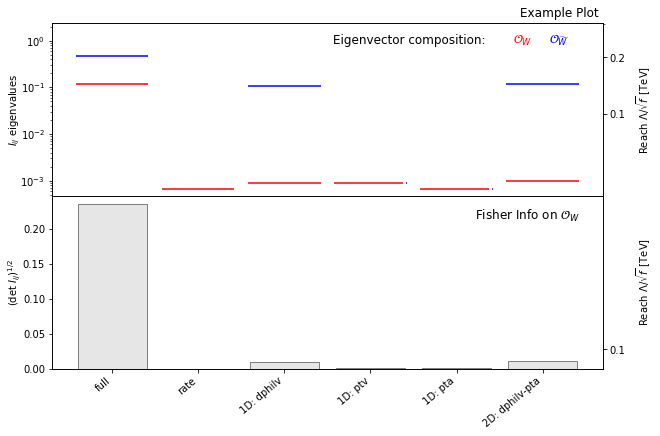

In [5]:
list_of_fi=[fi_full,fi_rate,fi_1D_dphilv,fi_1D_dptv,fi_1D_dpta,fi_2D_dphilv_dpta]
list_of_labels=["full","rate","1D: dphilv","1D: ptv","1D: pta","2D: dphilv-pta"]
list_of_cathegories=[1,1,1,1,1,1] 
list_of_operators=[r'$\mathcal{O}_{W}$',r'$\mathcal{O}_{\widetilde{W}}$']
list_of_projected_fi=[ project_information(list_of_fi[i],[0]) for i in range(0,len(list_of_fi))] 

plot_fisherinfo_barplot(matrices=list_of_fi,
                    matrices_for_determinants=list_of_fi,
                    labels=list_of_labels,
                    categories=list_of_cathegories,
                    operatorlabels=list_of_operators,
                    filename="figures/output.pdf",
                    additional_label="Fisher Info on $\mathcal{O}_{W}$",
                    top_label="Example Plot ",
                    normalise_determinants=False,
                    use_bar_colors=False,
                    eigenvalue_operator_legend=True)

### 7b) Contour Plot 

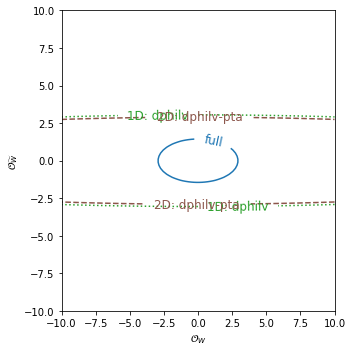

In [6]:
figtruth = plot_fisher_information_contours_2d(fisher_information_matrices=list_of_fi, 
                                        contour_distance=1,
                                        xlabel=r'$\mathcal{O}_{W}$',
                                        ylabel=r'$\mathcal{O}_{\widetilde{W}}$',
                                        xrange=(-10.,10.),
                                        yrange=(-10.,10.),
                                        inline_labels=list_of_labels,
                                        resolution=100)

### 7c) Distribution Plot

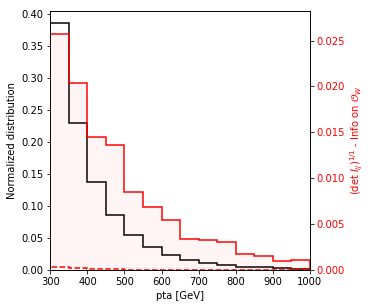

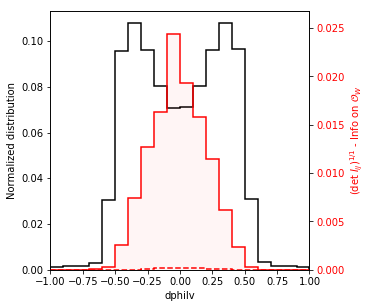

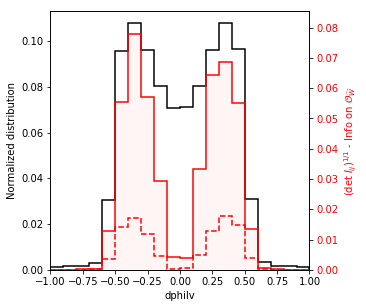

In [5]:
# pta distribution
bins_histo, w_in_histo, fi_histo_rate, fi_histo_full = mf.histogram_of_fisher_information( theta=thistheta,
                                    luminosity=thislumi,
                                    observable=obs_pta,
                                    nbins=obs_pta_nbins,
                                    histrange=obs_pta_range,
                                    cuts=thiscuts,
                                    efficiency_functions=thisefficiencies
                                   )

proj_fi_histo_rate=[ project_information(fi_histo_rate[i],[0]) for i in range(0,len(fi_histo_rate))] 
proj_fi_histo_full=[ project_information(fi_histo_full[i],[0]) for i in range(0,len(fi_histo_full))] 

kinematic_distribution_of_information(xbins=bins_histo, 
                  xlabel="pta [GeV]",
                  xmin=300,
                  xmax=1000,
                  xsecs=w_in_histo,
                  matrices=proj_fi_histo_full, 
                  matrices_aux=proj_fi_histo_rate,
                  filename="figures/kinematics.pdf",
                  ylabel_addition=' - Info on $\mathcal{O}_{W}$',
                  log_xsec=False,
                  norm_xsec=True,
                  show_aux=True
                  )

# dphi_lv distribution
bins_histo, w_in_histo, fi_histo_rate, fi_histo_full = mf.histogram_of_fisher_information( theta=thistheta,
                                    luminosity=thislumi,
                                    observable=obs_dphilv,
                                    nbins=obs_dphilv_nbins,
                                    histrange=obs_dphilv_range,
                                    cuts=thiscuts,
                                    efficiency_functions=thisefficiencies
                                   )

proj_fi_histo_rate=[ project_information(fi_histo_rate[i],[0]) for i in range(0,len(fi_histo_rate))] 
proj_fi_histo_full=[ project_information(fi_histo_full[i],[0]) for i in range(0,len(fi_histo_full))] 

kinematic_distribution_of_information(xbins=bins_histo, 
                  xlabel="dphilv",
                  xmin=-1,
                  xmax=1,
                  xsecs=w_in_histo,
                  matrices=proj_fi_histo_full, 
                  matrices_aux=proj_fi_histo_rate,
                  filename="figures/kinematics.pdf",
                  ylabel_addition=' - Info on $\mathcal{O}_{W}$',
                  log_xsec=False,
                  norm_xsec=True,
                  show_aux=True
            )

proj_fi_histo_rate=[ project_information(fi_histo_rate[i],[1]) for i in range(0,len(fi_histo_rate))] 
proj_fi_histo_full=[ project_information(fi_histo_full[i],[1]) for i in range(0,len(fi_histo_full))] 

kinematic_distribution_of_information(xbins=bins_histo, 
                  xlabel="dphilv",
                  xmin=-1,
                  xmax=1,
                  xsecs=w_in_histo,
                  matrices=proj_fi_histo_full, 
                  matrices_aux=proj_fi_histo_rate,
                  filename="figures/kinematics.pdf",
                  ylabel_addition=' - Info on $\mathcal{O}_{\widetilde{W}}$',
                  log_xsec=False,
                  norm_xsec=True,
                  show_aux=True
            )

## 6. Make (unweighted) training and test samples with augmented data

In [16]:
#create sample augmenter
sa = SampleAugmenter('data/madminer_wgamma_observables_100k.h5', debug=False)
n_estimators = 5

#augment train sample
for i in range(n_estimators):
    x, theta, t_xz = sa.extract_samples_train_local(
        theta=constant_benchmark_theta('sm'),
        n_samples=50000,
        folder='./data/samples_100k/',
        filename='train{}'.format(i)
    )

#augment test sample
x, theta = sa.extract_samples_test(
    theta=constant_benchmark_theta('sm'),
    n_samples=50000,
    folder='./data/samples_100k/',
    filename='test'
)

15:31  Loading data from data/madminer_wgamma_observables_100k.h5
15:31  Found 2 parameters:
15:31     CWL2 (LHA: dim6 2, maximal power in squared ME: (2,), range: (-50.0, 50.0))
15:31     CPWL2 (LHA: dim6 5, maximal power in squared ME: (2,), range: (-50.0, 50.0))
15:31  Found 6 benchmarks:
15:31     sm: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
15:31     w: CWL2 = 20.00, CPWL2 = 0.00e+00
15:31     morphing_basis_vector_2: CWL2 = -4.73e+01, CPWL2 = 40.13
15:31     morphing_basis_vector_3: CWL2 = 15.34, CPWL2 = -4.57e+01
15:31     morphing_basis_vector_4: CWL2 = 29.31, CPWL2 = 43.87
15:31     morphing_basis_vector_5: CWL2 = -4.19e+01, CPWL2 = -2.24e-01
15:31  Found 23 observables: px_l, px_v, px_a, py_l, py_v, py_a, pz_l, pz_v, pz_a, e_l, e_v, e_a, pt_l, pt_v, pt_a, eta_l, eta_v, eta_a, dphi_lv, dphi_la, dphi_va, m_lv, m_lva
15:31  Found 100000 events
15:31  Found morphing setup with 6 components
15:31  Extracting training sample for local score regression. Sampling and score evaluation accord

## 7. Train a neural network to estimate the score

### 7a) Change Features

In [26]:
#NN Settings
n_hidden = (100,100,100)
n_epochs = 10
batch_size = 128
initial_lr=0.002
final_lr=0.00001
myfeatures=[(0,1,2,3,4,5,6,7,8),(0,1,2,3,4,5,6,7,8,9,10,11),(12,13,14,15,16,17,18,19,20,21,22),(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22)]
myfeaturename=["mom","enmom","high","all"]

#Run NN
for ii in range(len(features)):
    #Setup ensemble
    ensemble = EnsembleForge(estimators=n_estimators)
    #train ensemble
    ensemble.train_all(
        method='sally',
        x_filename=['data/samples_100k/x_train{}.npy'.format(i) for i in range(n_estimators)],
        t_xz0_filename=['data/samples_100k/t_xz_train{}.npy'.format(i) for i in range(n_estimators)],
        n_epochs=n_epochs,
        batch_size=batch_size,
        validation_split=None,
        n_hidden=n_hidden,
        initial_lr=initial_lr,
        final_lr=final_lr,
        features=myfeatures[ii]
    )
    #save ensemble
    ensemble.save('models/samples_100k/sally_ensemble_100k_{}'.format(myfeaturename[ii]))

15:34  Training 5 estimators in ensemble
15:34  Training estimator 1 / 5 in ensemble
15:34  Starting training
15:34    Method:                 sally
15:34    Training data: x at data/samples_100k/x_train0.npy
15:34                   t_xz (theta0) at  data/samples_100k/t_xz_train0.npy
15:34    Features:               (0, 1, 2, 3, 4, 5, 6, 7, 8)
15:34    Method:                 sally
15:34    Hidden layers:          (100, 100, 100)
15:34    Activation function:    tanh
15:34    Batch size:             128
15:34    Epochs:                 10
15:34    Learning rate:          0.002 initially, decaying to 1e-05
15:34    Validation split:       None
15:34    Early stopping:         True
15:34  Loading training data
15:34  Found 50000 samples with 2 parameters and 23 observables
15:34  Only using 9 of 23 observables
15:34  Creating model for method sally
15:34  Training model
15:34    Epoch 1: train loss 0.00 ([0.00348755])
15:34    Epoch 2: train loss 0.00 ([0.00293794])
15:34    Epoch 3: tra

15:35    Method:                 sally
15:35    Hidden layers:          (100, 100, 100)
15:35    Activation function:    tanh
15:35    Batch size:             128
15:35    Epochs:                 10
15:35    Learning rate:          0.002 initially, decaying to 1e-05
15:35    Validation split:       None
15:35    Early stopping:         True
15:35  Loading training data
15:35  Found 50000 samples with 2 parameters and 23 observables
15:35  Only using 12 of 23 observables
15:35  Creating model for method sally
15:35  Training model
15:35    Epoch 1: train loss 0.00 ([0.00381457])
15:35    Epoch 2: train loss 0.00 ([0.00294153])
15:35    Epoch 3: train loss 0.00 ([0.0028755])
15:35    Epoch 4: train loss 0.00 ([0.00281582])
15:35    Epoch 5: train loss 0.00 ([0.00276841])
15:35    Epoch 6: train loss 0.00 ([0.00273379])
15:35    Epoch 7: train loss 0.00 ([0.00270494])
15:35    Epoch 8: train loss 0.00 ([0.00268789])
15:35    Epoch 9: train loss 0.00 ([0.00267691])
15:35    Epoch 10: train

15:36    Learning rate:          0.002 initially, decaying to 1e-05
15:36    Validation split:       None
15:36    Early stopping:         True
15:36  Loading training data
15:36  Found 50000 samples with 2 parameters and 23 observables
15:36  Only using 11 of 23 observables
15:36  Creating model for method sally
15:36  Training model
15:36    Epoch 1: train loss 0.00 ([0.00402006])
15:36    Epoch 2: train loss 0.00 ([0.00279979])
15:36    Epoch 3: train loss 0.00 ([0.00266098])
15:36    Epoch 4: train loss 0.00 ([0.00261341])
15:36    Epoch 5: train loss 0.00 ([0.00258196])
15:36    Epoch 6: train loss 0.00 ([0.00256371])
15:36    Epoch 7: train loss 0.00 ([0.00255539])
15:36    Epoch 8: train loss 0.00 ([0.00254483])
15:36    Epoch 9: train loss 0.00 ([0.00253952])
15:36    Epoch 10: train loss 0.00 ([0.00254412])
15:36  Finished training
15:36  Training estimator 2 / 5 in ensemble
15:36  Starting training
15:36    Method:                 sally
15:36    Training data: x at data/sampl

15:37  Found 50000 samples with 2 parameters and 23 observables
15:37  Only using 23 of 23 observables
15:37  Creating model for method sally
15:37  Training model
15:37    Epoch 1: train loss 0.00 ([0.00396736])
15:37    Epoch 2: train loss 0.00 ([0.00294485])
15:37    Epoch 3: train loss 0.00 ([0.00288087])
15:37    Epoch 4: train loss 0.00 ([0.00280539])
15:37    Epoch 5: train loss 0.00 ([0.00275638])
15:37    Epoch 6: train loss 0.00 ([0.00271413])
15:38    Epoch 7: train loss 0.00 ([0.0026927])
15:38    Epoch 8: train loss 0.00 ([0.00266771])
15:38    Epoch 9: train loss 0.00 ([0.00265355])
15:38    Epoch 10: train loss 0.00 ([0.00264657])
15:38  Finished training
15:38  Training estimator 2 / 5 in ensemble
15:38  Starting training
15:38    Method:                 sally
15:38    Training data: x at data/samples_100k/x_train1.npy
15:38                   t_xz (theta0) at  data/samples_100k/t_xz_train1.npy
15:38    Features:               (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

## 8. FisherInfo for Processed Data

In [32]:
#Setup MadFisher
fisher = FisherInformation('data/madminer_wgamma_observables_100k.h5', debug=False)

#Run MadFisher
fi_det_mean_100k_all, fi_det_cov_100k_all = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.], luminosity=300*1000.,
    model_file='models/samples_100k/sally_ensemble_100k_all',
    unweighted_x_sample_file='data/samples_100k/x_test.npy'
)
fi_det_mean_100k_high, fi_det_cov_100k_high = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.], luminosity=300*1000.,
    model_file='models/samples_100k/sally_ensemble_100k_high',
    unweighted_x_sample_file='data/samples_100k/x_test.npy'
)
fi_det_mean_100k_mom, fi_det_cov_100k_mom = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.], luminosity=300*1000.,
    model_file='models/samples_100k/sally_ensemble_100k_mom',
    unweighted_x_sample_file='data/samples_100k/x_test.npy'
)
fi_det_mean_100k_enmom, fi_det_cov_100k_enmom = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.], luminosity=300*1000.,
    model_file='models/samples_100k/sally_ensemble_100k_enmom',
    unweighted_x_sample_file='data/samples_100k/x_test.npy'
)

#Run MadFisher Truth
fi_pl_full_100k = fisher.calculate_fisher_information_full_truth(theta=[0.,0.],luminosity=300*1000.)
#fi_pl_full_500k = fisher.calculate_fisher_information_full_truth(theta=[0.,0.],luminosity=300*1000.)

15:42  Loading data from data/madminer_wgamma_observables_100k.h5
15:42  Found 2 parameters:
15:42     CWL2 (LHA: dim6 2, maximal power in squared ME: (2,), range: (-50.0, 50.0))
15:42     CPWL2 (LHA: dim6 5, maximal power in squared ME: (2,), range: (-50.0, 50.0))
15:42  Found 6 benchmarks:
15:42     sm: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
15:42     w: CWL2 = 20.00, CPWL2 = 0.00e+00
15:42     morphing_basis_vector_2: CWL2 = -4.73e+01, CPWL2 = 40.13
15:42     morphing_basis_vector_3: CWL2 = 15.34, CPWL2 = -4.57e+01
15:42     morphing_basis_vector_4: CWL2 = 29.31, CPWL2 = 43.87
15:42     morphing_basis_vector_5: CWL2 = -4.19e+01, CPWL2 = -2.24e-01
15:42  Found 23 observables: px_l, px_v, px_a, py_l, py_v, py_a, pz_l, pz_v, pz_a, e_l, e_v, e_a, pt_l, pt_v, pt_a, eta_l, eta_v, eta_a, dphi_lv, dphi_la, dphi_va, m_lv, m_lva
15:42  Found 100000 events
15:42  Found morphing setup with 6 components
15:43  Loading ensemble setup from models/samples_100k/sally_ensemble_100k_all/ensemble.json
15:43

15:43    Found method sally, 9 observables, 2 parameters, (100, 100, 100) hidden layers, tanh activation function, features [0, 1, 2, 3, 4, 5, 6, 7, 8]
15:43  Loading state dictionary from models/samples_100k/sally_ensemble_100k_mom/estimator_2_state_dict.pt
15:43  Loading settings from models/samples_100k/sally_ensemble_100k_mom/estimator_3_settings.json
15:43    Found method sally, 9 observables, 2 parameters, (100, 100, 100) hidden layers, tanh activation function, features [0, 1, 2, 3, 4, 5, 6, 7, 8]
15:43  Loading state dictionary from models/samples_100k/sally_ensemble_100k_mom/estimator_3_state_dict.pt
15:43  Loading settings from models/samples_100k/sally_ensemble_100k_mom/estimator_4_settings.json
15:43    Found method sally, 9 observables, 2 parameters, (100, 100, 100) hidden layers, tanh activation function, features [0, 1, 2, 3, 4, 5, 6, 7, 8]
15:43  Loading state dictionary from models/samples_100k/sally_ensemble_100k_mom/estimator_4_state_dict.pt
15:43  Evaluating Fisher 

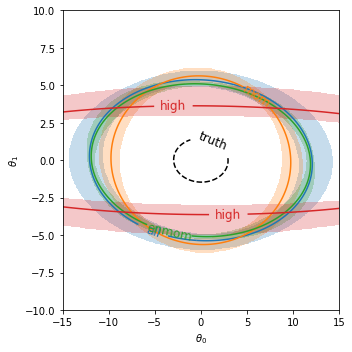

In [38]:
#Plot FisherInfo
fignn = plot_fisher_information_contours_2d(
    [fi_det_mean_100k_all,fi_det_mean_100k_mom,fi_det_mean_100k_enmom,fi_det_mean_100k_high, fi_pl_full_100k],
    [fi_det_cov_100k_all ,fi_det_cov_100k_mom ,fi_det_cov_100k_enmom ,fi_det_cov_100k_high , None           ],
    colors=[u'C0',u'C1',u'C2',u'C3',"black"],
    linestyles=["solid","solid","solid","solid","dashed"],
    inline_labels=["all","mom","enmom","high","truth"],
    xrange=(-15.,15.),
    yrange=(-10.,10.),
)

In [22]:
colors = ["C" + str(i) for i in range(10)] * (10 // 10 + 1)
colors

[u'C0',
 u'C1',
 u'C2',
 u'C3',
 u'C4',
 u'C5',
 u'C6',
 u'C7',
 u'C8',
 u'C9',
 u'C0',
 u'C1',
 u'C2',
 u'C3',
 u'C4',
 u'C5',
 u'C6',
 u'C7',
 u'C8',
 u'C9']

In [24]:
features=[(0,1,2,3,4,5,6,7,8),(0,1,2,3,4,5,6,7,8,9,10,11),(12,13,14,15,16,17,18,19,20,21,22),(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22)]
featurename=["mom","enmom","high","all"]

for i in range(len(features)):
    print(features[i])

(0, 1, 2, 3, 4, 5, 6, 7, 8)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
(12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22)
